# K-Means Clustering

## Importing Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from confusion import cm_analysis
from sklearn import metrics
from sklearn.cluster import KMeans
from time import time
from sklearn.decomposition import PCA
sc = StandardScaler()
%matplotlib inline
from matplotlib.colors import ListedColormap
colours = ListedColormap(['r','b','g'])
colours = ListedColormap(['red','blue','gree', 'black'])

## Pre-processing

### Reading the data.

In [25]:
dataset = pd.read_csv('heart.csv')
# drop row_name column
dataset.drop(columns=['row.names'],inplace=True)

### One-hot encoding the cateogorical variables.

In [26]:
dataset_transformed = pd.get_dummies(dataset, prefix='famhist')

### Exploratory Data Analysis (EDA).

<Figure size 432x288 with 0 Axes>

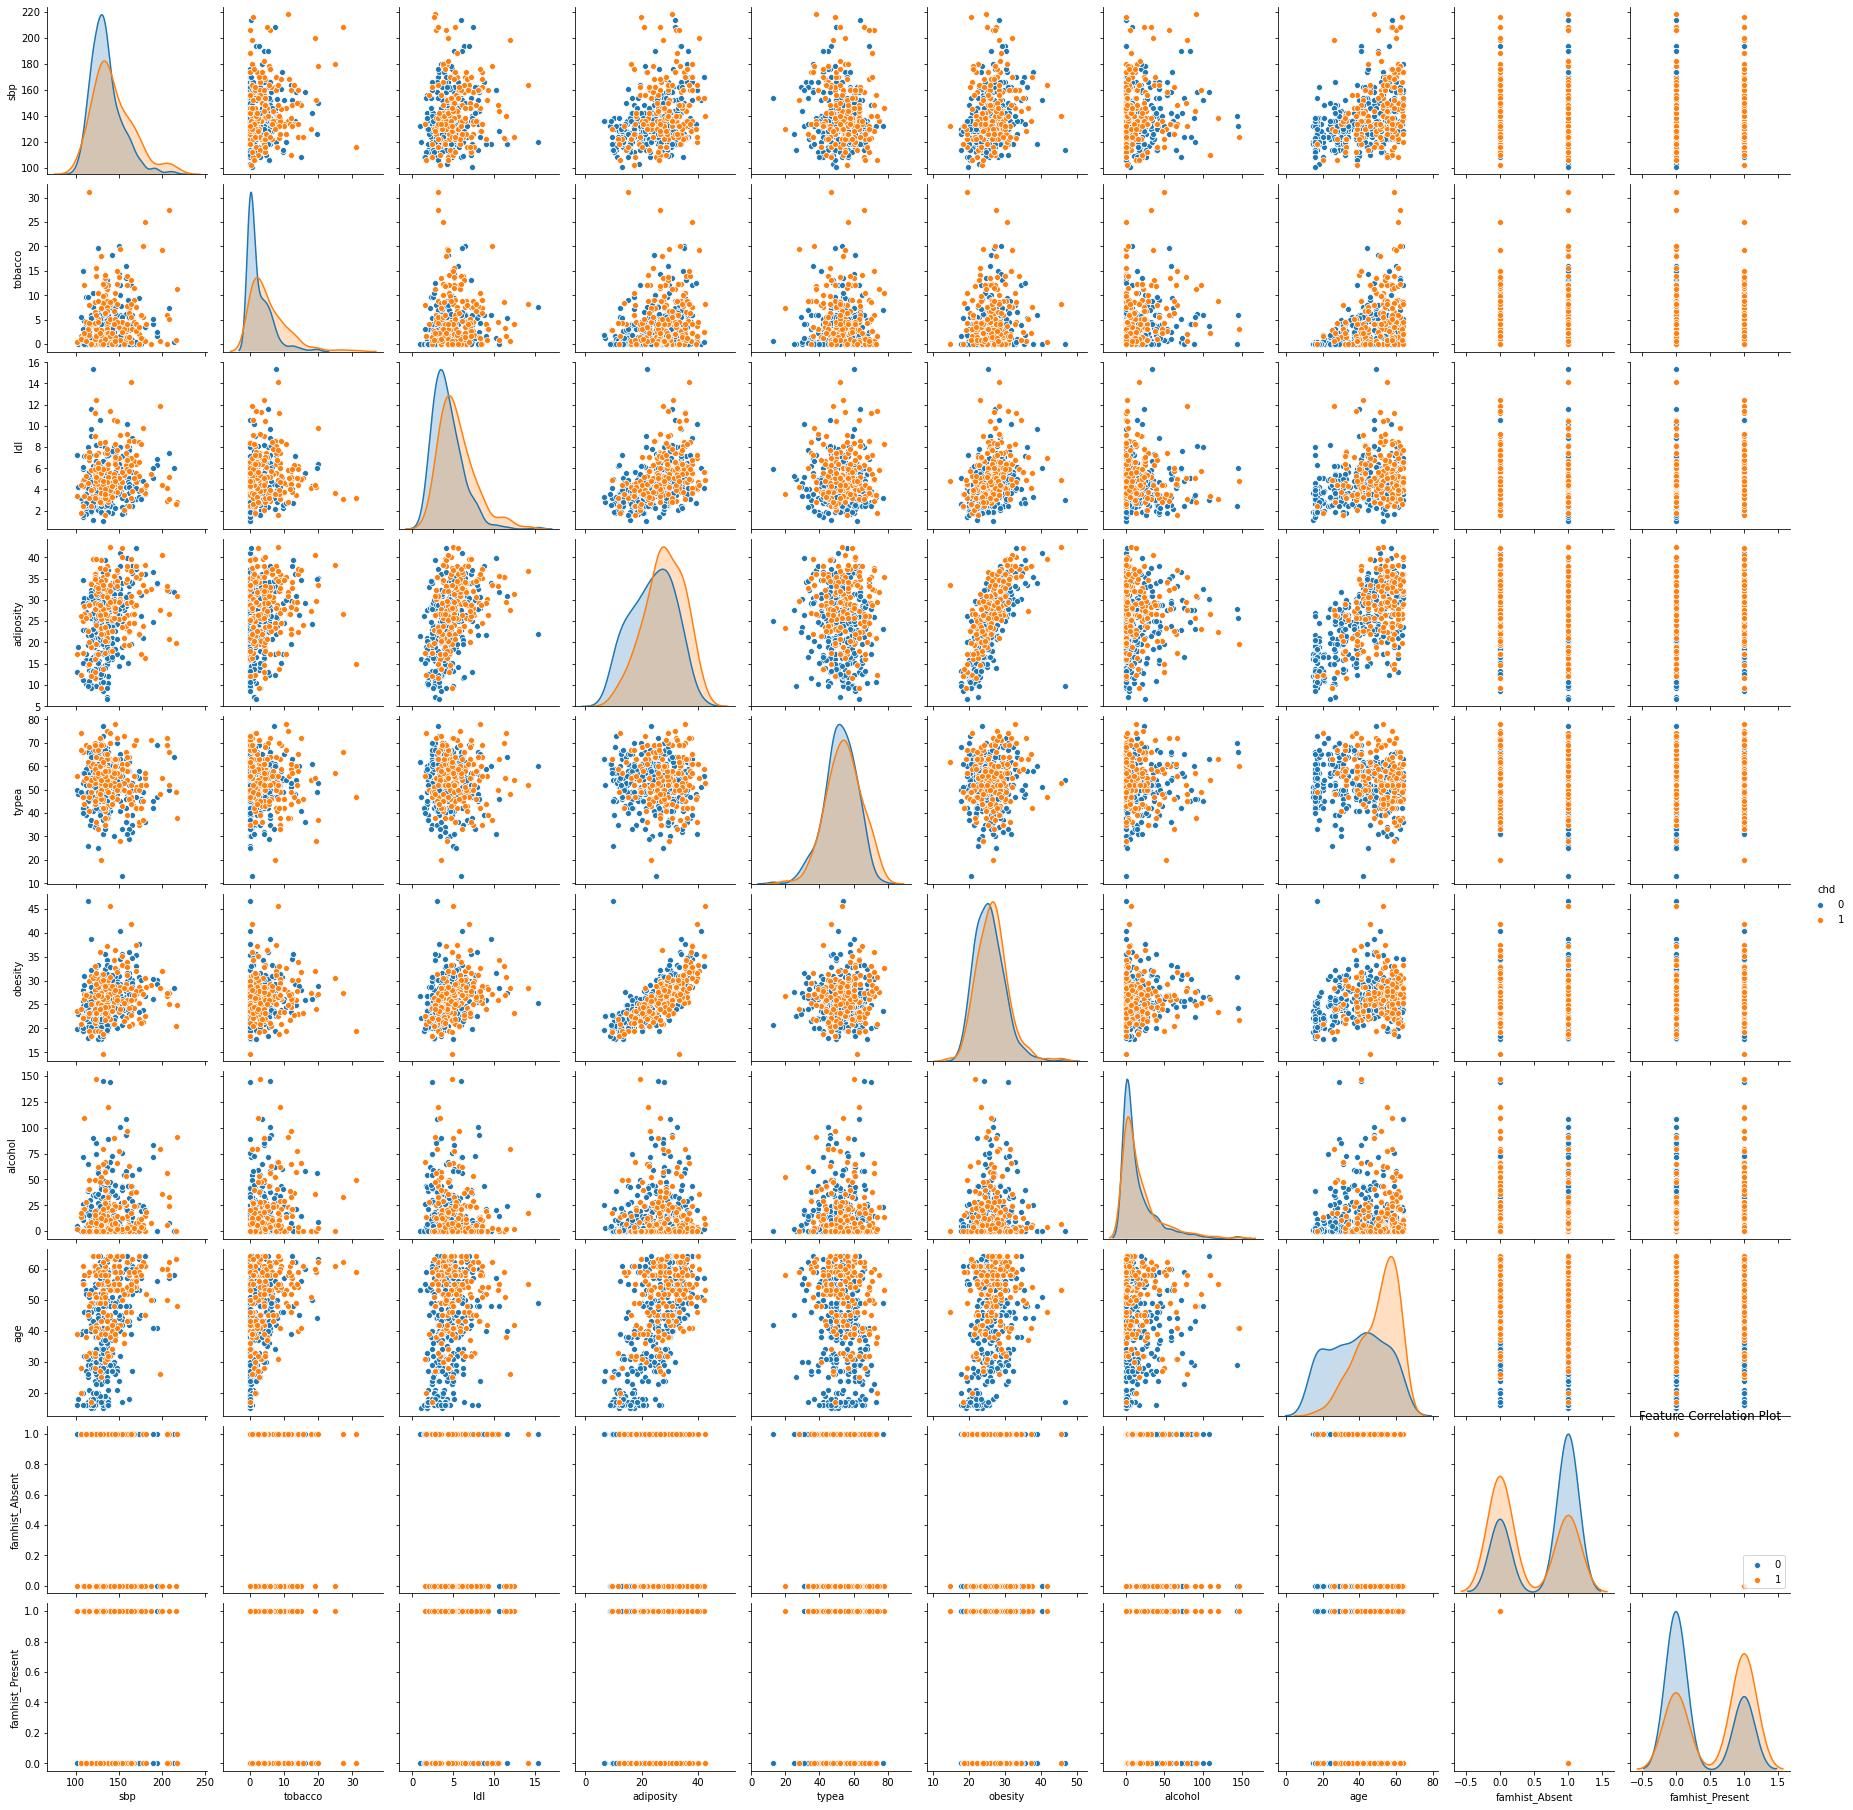

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure()
sns.pairplot(dataset_transformed, hue="chd", height=2.5)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Correlation Plot')
plt.legend(loc="lower right")
plt.show()
plt.savefig('pair_plot')

### Removing target values to use in K-Means clustering which is an unsupervised learning method.

In [28]:
dataset_transformed_X = dataset_transformed.drop(columns=['chd'])

In [29]:
labels = dataset_transformed['chd']
sample_size = len(labels)
n_digits = len(np.unique(labels))

In [30]:
def bench_k_means(estimator, name, data):
    print(82 * '_')
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    t0 = time()
    estimator.fit(data)
    # print('time\tinertia\thomogeneity_score\tcompleteness_score\tv_measure_score\tadjusted_rand_score\tadjusted_mutual_info_score\tsilhouette_score')
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
random   	0.06s	464589	0.003	0.005	0.004	0.020	0.002	0.407


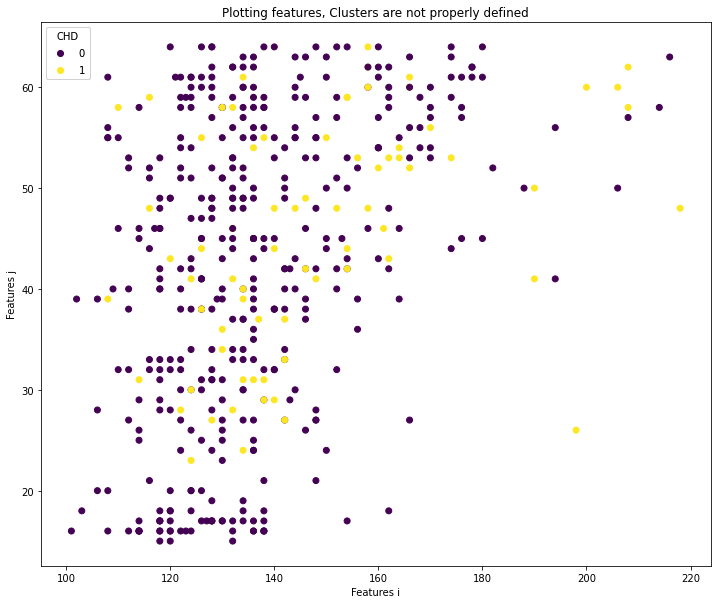

In [31]:
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=dataset_transformed_X)
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(dataset_transformed_X)
# Step size of the mesh. Decrease to increase the quality of the VQ.
random_state = 42

# Plot the decision boundary. For that, we will assign a color to each
data = dataset_transformed_X.values
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(data[:, 0], data[:, 7], c=y_pred)
legend1 = ax.legend(*scatter.legend_elements(num=1),
                    loc="upper left", title="CHD")
ax.add_artist(legend1)
plt.xlabel('Features i')
plt.ylabel('Features j')
plt.title("Plotting features, Clusters are not properly defined")
plt.savefig('simple-kmean-allfeatures')

## Calculating PCA for two components.

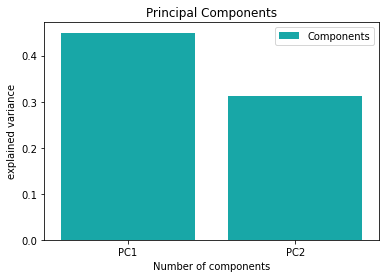

In [9]:
pca = PCA(n_components=2, whiten = True)
X_PCA = pca.fit_transform(dataset_transformed_X)

plt.figure()
df = pd.DataFrame({'var':sorted(pca.explained_variance_ratio_, reverse=True),
             'PC':["PC"+str(i+1) for i in range(0,2)]})

sns.barplot(x='PC',y="var", 
           data=df, color="c", label="Components");
plt.xlabel('Number of components')
plt.ylabel('explained variance');
plt.title('Principal Components')
plt.legend()
plt.savefig('pca_explained_varience-twoPC')

### Confusion Matrix to calculate the accuracy of the simple k-means.

In [10]:
from sklearn.metrics import confusion_matrix
reg_k_clusters = y_pred
ab = dataset_transformed_X = dataset_transformed.drop(columns=['sbp','tobacco', 'adiposity', 'ldl','typea', 'obesity', 'alcohol', 'age','famhist_Absent','famhist_Present'])
c=dataset_transformed["chd"].values.tolist()
confusion_matrix(ab, reg_k_clusters , labels=None, sample_weight=None)

array([[260,  42],
       [129,  31]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report, accuracy_score
print (metrics.accuracy_score(c, y_pred, normalize=True, sample_weight=None))
print (metrics.classification_report(c, reg_k_clusters , labels=None, sample_weight=None))

0.6233766233766234
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       302
           1       0.42      0.19      0.27       160

    accuracy                           0.63       462
   macro avg       0.55      0.53      0.51       462
weighted avg       0.58      0.63      0.58       462



## Plotting the features of k-means after PCA.

Text(0.5, 1.0, 'Simple PCA features of Heart Dataset')

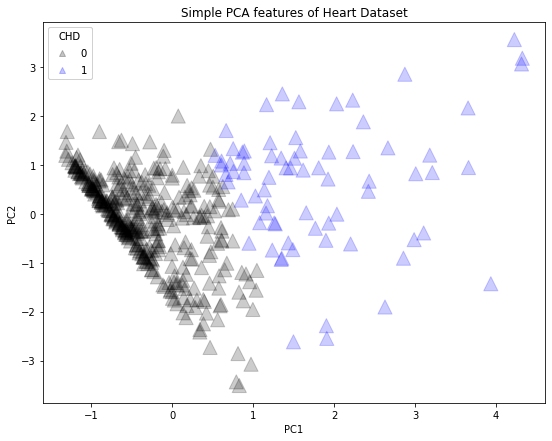

In [12]:
# fig = plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, marker='^', s=200, alpha=0.2, cmap=ListedColormap(['black','blue']))
legend1 = ax.legend(*scatter.legend_elements(num=1),
                    loc="upper left", title="CHD")
ax.add_artist(legend1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Simple PCA features of Heart Dataset")

## Calculating the K-mean with the PCA of n_components = 2.

In [13]:
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_PCA)

## Plotting the k-means features after PCA of n_components = 2.

Text(0.5, 1.0, 'Principal Component Analysis of Heart Dataset')

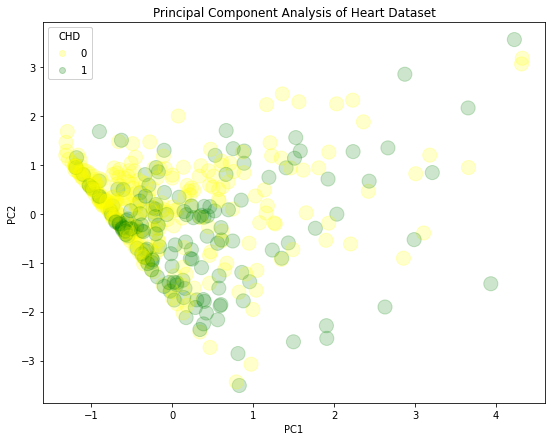

In [14]:
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=dataset_transformed["chd"].values.tolist(), marker='o',s=200, alpha=0.2, cmap=ListedColormap(['yellow','green']))
legend3 = ax.legend(*scatter.legend_elements(num=1),
                    loc="upper left", title="CHD")
ax.add_artist(legend3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Principal Component Analysis of Heart Dataset")

## Calculating the Accuracy and confusion matrix.

In [22]:
print (confusion_matrix(ab, y_pred , labels=None, sample_weight=None))
print (metrics.accuracy_score(ab, y_pred, normalize=True, sample_weight=None))
print (metrics.classification_report(ab, y_pred , labels=None, sample_weight=None))

[[258  44]
 [130  30]]
0.6233766233766234
              precision    recall  f1-score   support

           0       0.66      0.85      0.75       302
           1       0.41      0.19      0.26       160

    accuracy                           0.62       462
   macro avg       0.54      0.52      0.50       462
weighted avg       0.58      0.62      0.58       462



## Visualizing both comparisons in one graph.

Text(0.5, 1.0, 'Principal Component Analysis of Heart Dataset')

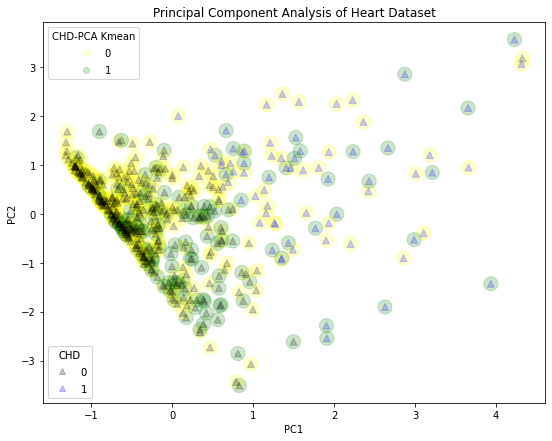

In [16]:
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=dataset_transformed["chd"].values.tolist(), marker='o',s=200, alpha=0.2, cmap=ListedColormap(['yellow','green']))
legend3 = ax.legend(*scatter.legend_elements(num=1),
                    loc="upper left", title="CHD-PCA Kmean")
ax.add_artist(legend3)
plt.xlabel('Features 0')
plt.ylabel('Features 1')

scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, marker='^', s=50, alpha=0.2, cmap=ListedColormap(['black','blue']))
legend1 = ax.legend(*scatter.legend_elements(num=1),
                    loc="lower left", title="CHD")
ax.add_artist(legend1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Principal Component Analysis of Heart Dataset")